In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**7. The Wage data set contains a number of other features not explored
in this chapter, such as marital status ( maritl ), job class ( jobclass ),
and others. Explore the relationships between some of these other
predictors and wage , and use non-linear fitting techniques in order to
fit flexible models to the data. Create plots of the results obtained,
and write a summary of your findings.**

In [3]:
Wage = pd.read_csv("data/Wage.csv")
Wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


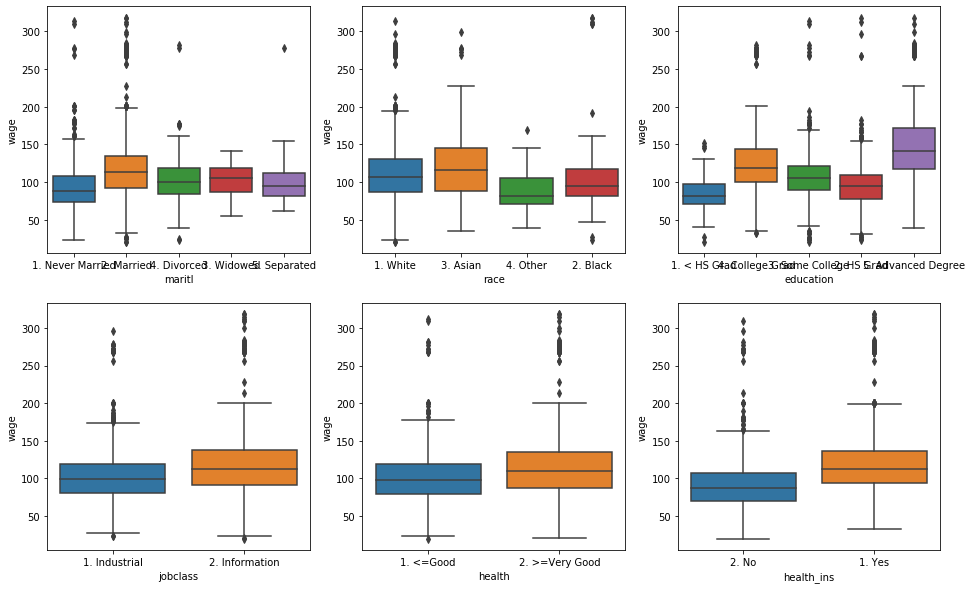

In [4]:
#对定性变量通过分布图分析（其中sex与region只有单一取值，不用分析）
import seaborn as sns
plt.figure(figsize=(16,10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)
sns.boxplot('maritl', 'wage', data=Wage, orient='v',ax = ax1)
sns.boxplot('race', 'wage', data=Wage, orient='v',ax = ax2)
sns.boxplot('education', 'wage', data=Wage, orient='v',ax = ax3)
sns.boxplot('jobclass', 'wage', data=Wage, orient='v',ax = ax4)
sns.boxplot('health', 'wage', data=Wage, orient='v',ax = ax5)
sns.boxplot('health_ins', 'wage', data=Wage, orient='v',ax = ax6)
plt.show()

定性变量与wage分布关系来看，已婚的高于未婚收入，亚洲血统收入更高，教育程度越高收入越高，信息行业高于工业收入，健康程度越好收入越高

In [5]:
#7.6得到了age的拟合次幂为3，这里用同样的方法得到year的拟合次幂
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly
fit_1 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',1)),data = Wage).fit()
fit_2 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',2)),data = Wage).fit()
fit_3 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',3)),data = Wage).fit()
fit_4 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',4)),data = Wage).fit()
fit_5 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',5)),data = Wage).fit()
fit_6 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',6)),data = Wage).fit()
fit_7 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',7)),data = Wage).fit()
fit_8 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',8)),data = Wage).fit()
fit_9 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',9)),data = Wage).fit()
fit_10 = smf.ols('wage ~ {}'.format(patsy_model_poly('year',10)),data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4,fit_5,fit_6,fit_7,fit_8,fit_9,fit_10, typ=1)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.199651e+06,0.0,NaN,NaN,NaN
1,2997.0,5.198366e+06,1.0,1285.420349,0.740760,0.389486
2,2997.0,5.198368e+06,-0.0,-2.236853,inf,NaN
3,2997.0,5.198370e+06,-0.0,-2.233626,inf,NaN
4,2997.0,5.198373e+06,-0.0,-2.245460,inf,NaN
5,2997.0,5.198370e+06,-0.0,2.688258,-inf,NaN
6,2996.0,5.198357e+06,1.0,12.861562,0.007412,0.931399
7,2995.0,5.194082e+06,1.0,4275.175023,2.463692,0.116610
8,2994.0,5.193986e+06,1.0,95.987977,0.055316,0.814075
9,2993.0,5.193667e+06,1.0,318.746024,0.183687,0.668255


可见year从2次方即p值不可信

In [6]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.94
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           0.000328
Time:                        10:39:43   Log-Likelihood:                -15443.
No. Observations:                3000   AIC:                         3.089e+04
Df Residuals:                    2998   BIC:                         3.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2595.8616    752.824     -3.448      0.001   -4071.966   -1119.757
year           1.3499      0.375      3.597      0.000       0.614       2.086
==============================================================================
Omnibus:                     1058.180   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4375.260
Skew:                           1.688   Prob(JB):                         0.00
Kurtosis:                       7.859   Cond. No.                     1.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
fit_1 =  smf.ols('wage ~ {}'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_2 =  smf.ols('wage ~ year +  {}'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_3 =  smf.ols('wage ~ {} + maritl + race + education + jobclass + health + health_ins'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_4 =  smf.ols('wage ~ year + {} + maritl + race + education + jobclass + health + health_ins'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_5 =  smf.ols('wage ~ {} + maritl + jobclass'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_6 =  smf.ols('wage ~ year + {} + maritl + jobclass'.format(patsy_model_poly('age',3)),data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4,fit_5,fit_6,typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2996.0,4.777674e+06,0.0,NaN,NaN,NaN
1,2995.0,4.755892e+06,1.0,2.178248e+04,14.615442,1.345137e-04
2,2982.0,3.417180e+06,13.0,1.338712e+06,69.095294,1.031118e-159
3,2981.0,3.397370e+06,1.0,1.980958e+04,13.291682,2.711421e-04
4,2991.0,4.480323e+06,-10.0,-1.082953e+06,72.663159,NaN
5,2990.0,4.456219e+06,1.0,2.410460e+04,16.173522,5.922599e-05


这里可见fit_4 p值可信且SSR最小

In [8]:
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     88.95
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          7.32e-262
Time:                        10:39:43   Log-Likelihood:                -14805.
No. Observations:                3000   AIC:                         2.965e+04
Df Residuals:                    2981   BIC:                         2.976e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2545.0496    613.158     -4.151      0.000   -3747.306   -1342.793
maritl[T.2. Married]               13.4286      1.811      7.416      0.000       9.878      16.979
maritl[T.3. Widowed]                0.5424      7.961      0.068      0.946     -15.067      16.151
maritl[T.4. Divorced]               0.1560      2.929      0.053      0.958      -5.586       5.898
maritl[T.5. Separated]              7.2852      4.853      1.501      0.133      -2.230      16.800
race[T.2. Black]                   -4.7220      2.132     -2.215      0.027      -8.903      -0.541
race[T.3. Asian]                   -2.8149      2.586     -1.088      0.277      -7.886       2.256
race[T.4. Other]                   -5.7903      5.626     -1.029      0.303     -16.822       5.242
education[T.2. HS Grad]             7.5618      2.353      3.214      0.001       2.948      12.176
education[T.3. Some College]       18.0411      2.503      7.209      0.000      13.134      22.948
education[T.4. College Grad]       30.5493      2.532     12.064      0.000      25.584      35.514
education[T.5. Advanced Degree]    53.1328      2.794     19.017      0.000      47.654      58.611
jobclass[T.2. Information]          3.4960      1.315      2.659      0.008       0.918       6.074
health[T.2. >=Very Good]            6.2574      1.411      4.434      0.000       3.490       9.025
health_ins[T.2. No]               -16.4013      1.404    -11.683      0.000     -19.154     -13.649
year                                1.2730      0.305      4.169      0.000       0.674       1.872
age                                 3.5410      1.408      2.515      0.012       0.780       6.302
I(age ** 2)                        -0.0477      0.032     -1.495      0.135      -0.110       0.015
I(age ** 3)                         0.0002      0.000      0.666      0.506      -0.000       0.001
==============================================================================
Omnibus:                     1176.553   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7294.247
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                       9.801   Cond. No.                     1.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#这里比较自然样条纳入的情况
fit_1 = smf.ols('wage ~ cr(age,df = 3)',data = Wage).fit()
fit_2 = smf.ols('wage ~ cr(age,df = 4)',data = Wage).fit()
fit_3 = smf.ols('wage ~ cr(age,df = 5)',data = Wage).fit()
fit_4 = smf.ols('wage ~ cr(age,df = 6)',data = Wage).fit()
fit_5 = smf.ols('wage ~ cr(age,df = 7)',data = Wage).fit()
fit_6 = smf.ols('wage ~ cr(year,df = 3)',data = Wage).fit()
fit_7 = smf.ols('wage ~ cr(year,df = 4)',data = Wage).fit()
fit_8 = smf.ols('wage ~ cr(year,df = 5)',data = Wage).fit()
fit_9 = smf.ols('wage ~ cr(year,df = 6)',data = Wage).fit()
fit_10 = smf.ols('wage ~ cr(year,df = 7)',data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4,fit_5,fit_6,fit_7,fit_8,fit_9,fit_10, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2997.0,4.807824e+06,0.0,NaN,NaN,NaN
1,2996.0,4.782730e+06,1.0,25093.312847,14.455352,0.000146
2,2995.0,4.766637e+06,1.0,16093.115974,9.270663,0.002349
3,2994.0,4.765118e+06,1.0,1519.436155,0.875292,0.349570
4,2993.0,4.764902e+06,1.0,215.854865,0.124346,0.724393
5,2996.0,5.200289e+06,-3.0,-435386.845457,83.603549,NaN
6,2995.0,5.201357e+06,1.0,-1068.527404,-0.615540,1.000000
7,2995.0,5.200752e+06,-0.0,605.643740,-inf,NaN
8,2994.0,5.195602e+06,1.0,5149.306005,2.966329,0.085118
9,2992.0,5.193868e+06,2.0,1734.153256,0.499492,0.606890


可见自然样条age最高置信度为df = 5，year不适用

In [10]:
fit_1 =  smf.ols('wage ~ cr(age,df = 5)',data = Wage).fit()
fit_2 =  smf.ols('wage ~ year +  cr(age,df = 5)',data = Wage).fit()
fit_3 =  smf.ols('wage ~ cr(age,df = 5) + maritl + race + education + jobclass + health + health_ins',data = Wage).fit()
fit_4 =  smf.ols('wage ~ year + cr(age,df = 5) + maritl + race + education + jobclass + health + health_ins',data = Wage).fit()
fit_5 =  smf.ols('wage ~ cr(age,df = 5) + maritl + jobclass',data = Wage).fit()
fit_6 =  smf.ols('wage ~ year + cr(age,df = 5) + maritl + jobclass',data = Wage).fit()
fit_7 =  smf.ols('wage ~ year + {} + maritl + race + education + jobclass + health + health_ins'.format(patsy_model_poly('age',3)),data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4,fit_5,fit_6, fit_7 ,typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2995.0,4.766637e+06,0.0,NaN,NaN,NaN
1,2994.0,4.745158e+06,1.0,2.147893e+04,18.846540,1.463644e-05
2,2981.0,3.416298e+06,13.0,1.328860e+06,89.692242,1.891461e-202
3,2980.0,3.396305e+06,1.0,1.999383e+04,17.543454,2.889623e-05
4,2990.0,4.476159e+06,-10.0,-1.079854e+06,94.751068,NaN
5,2989.0,4.452280e+06,1.0,2.387868e+04,20.952186,4.900975e-06
6,2981.0,3.397370e+06,8.0,1.054910e+06,115.702918,6.708641e-169


这里的fit_4 ssr最低与之前的fit_4(这里的fit_7)接近

In [11]:
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     84.31
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          4.41e-261
Time:                        10:39:44   Log-Likelihood:                -14805.
No. Observations:                3000   AIC:                         2.965e+04
Df Residuals:                    2980   BIC:                         2.977e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2076.4277    510.569     -4.067      0.000   -3077.532   -1075.323
maritl[T.2. Married]               13.3369      1.817      7.339      0.000       9.774      16.900
maritl[T.3. Widowed]                0.4362      7.966      0.055      0.956     -15.184      16.056
maritl[T.4. Divorced]               0.0613      2.931      0.021      0.983      -5.685       5.808
maritl[T.5. Separated]              7.2366      4.855      1.491      0.136      -2.282      16.755
race[T.2. Black]                   -4.7390      2.133     -2.222      0.026      -8.921      -0.557
race[T.3. Asian]                   -2.8094      2.588     -1.086      0.278      -7.884       2.265
race[T.4. Other]                   -5.6918      5.627     -1.012      0.312     -16.725       5.341
education[T.2. HS Grad]             7.5930      2.353      3.226      0.001       2.978      12.208
education[T.3. Some College]       18.0896      2.504      7.225      0.000      13.180      22.999
education[T.4. College Grad]       30.5961      2.533     12.080      0.000      25.630      35.562
education[T.5. Advanced Degree]    53.1534      2.796     19.011      0.000      47.671      58.636
jobclass[T.2. Information]          3.4845      1.315      2.649      0.008       0.905       6.063
health[T.2. >=Very Good]            6.2579      1.412      4.433      0.000       3.490       9.026
health_ins[T.2. No]               -16.4029      1.404    -11.682      0.000     -19.156     -13.650
year                                1.2794      0.305      4.188      0.000       0.680       1.878
cr(age, df=5)[0]                 -431.2598    102.145     -4.222      0.000    -631.542    -230.978
cr(age, df=5)[1]                 -410.6206    102.113     -4.021      0.000    -610.840    -210.401
cr(age, df=5)[2]                 -404.0152    102.139     -3.956      0.000    -604.285    -203.746
cr(age, df=5)[3]                 -408.7903    102.253     -3.998      0.000    -609.283    -208.297
cr(age, df=5)[4]                 -421.7417    102.339     -4.121      0.000    -622.403    -221.080
==============================================================================
Omnibus:                     1176.923   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7296.447
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                       9.801   Cond. No.                     9.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-28. This might indicate that there are
strong multicollinearity probl

In [12]:
#使用较差验证对比fit_4与fit_7
from sklearn.model_selection import KFold
def model_msr(data,ols_model,dmatrices_model,n_splits):
    kf = KFold(n_splits=n_splits, random_state=1,shuffle=True)
    kf.get_n_splits(data)
    msr = []
    for train_index, test_index in kf.split(data):
        results = smf.ols(ols_model , data = data.iloc[train_index]).fit()
        y_test ,X_test = patsy.dmatrices(dmatrices_model,data.iloc[test_index], return_type="dataframe")
        predict_test  = results.predict(data.iloc[test_index])
        msr.append(((np.c_[y_test].ravel() - predict_test)**2).mean())
    return np.array(msr)
fit_4_ols_model = 'wage ~ year + cr(age,df = 5) + maritl + race + education + jobclass + health + health_ins'
fit_7_ols_model = 'wage ~ year + {} + maritl + race + education + jobclass + health + health_ins'.format(patsy_model_poly('age',3))
fit_4_cv_msr = model_msr(Wage,fit_4_ols_model,fit_4_ols_model,10).mean()
fit_7_cv_msr = model_msr(Wage,fit_7_ols_model,fit_7_ols_model,10).mean()
print('fit_4_cv_msr: ',fit_4_cv_msr)
print('fit_7_cv_msr: ',fit_7_cv_msr)

fit_4_cv_msr:  1148.9728738220729
fit_7_cv_msr:  1148.478006104734
